In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [3]:
os.chdir('..')

In [4]:
import helper as h
from utilsstreamlit import read_plot_info

In [5]:
#here, the lenguage and lemmatization option is chosen
netName = 'Spanish'
lemmatized = False
if lemmatized:
    iol = 'lemmatized'
    netPath = 'files/lemmatized/networks/'
    folderframe = 'files/lemmatized/dfplot/'
else:
    iol = 'inflected'
    netPath = 'files/inflected/networks/'
    folderframe = 'files/inflected/dfplot/'

fNeighborMean = False
fNeighborStd = False 
#Reading saved properties from the network
(nodeList, propertiesDict) = h.readNetworkProperties(netName, netPath, fNeighborMean, fNeighborStd);
(includedProperties, excludedProperties) = h.findPathologicalProperties(propertiesDict);
includedProperties

['degree',
 'eigenvectorCentrality',
 'betweennessCentrality',
 'closenessCentrality',
 'harmonicCentrality',
 'pagerank',
 'coreNumber',
 'onionLayer',
 'effectiveSize',
 'nodeCliqueNumber',
 'numberOfCliques',
 'clustering',
 'squareClustering',
 'closenessVitality',
 'constraint']

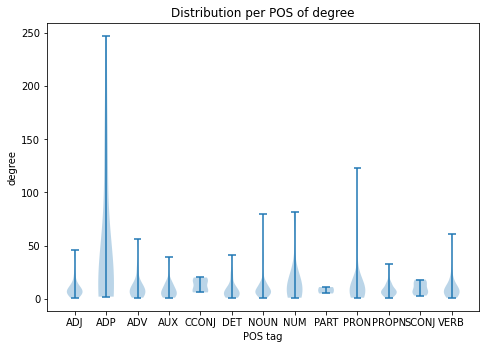

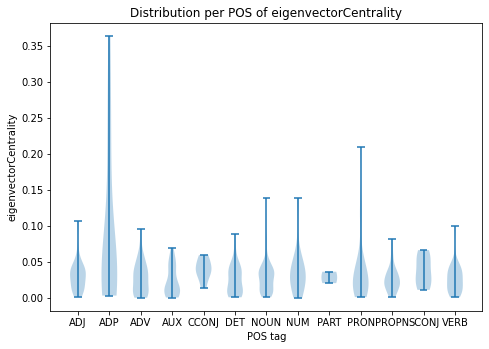

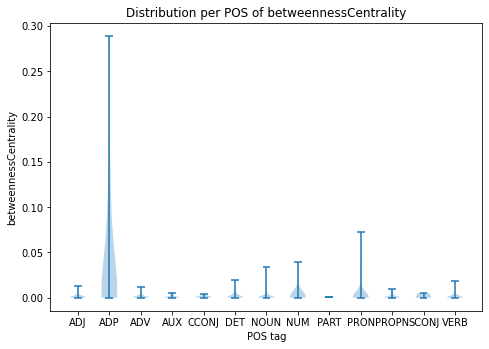

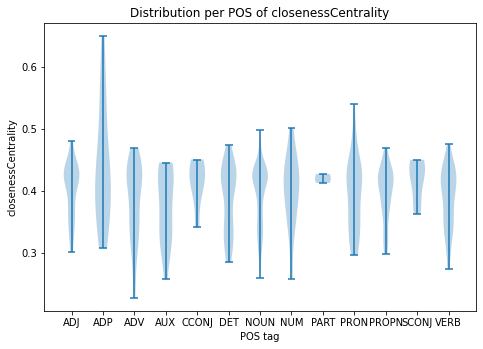

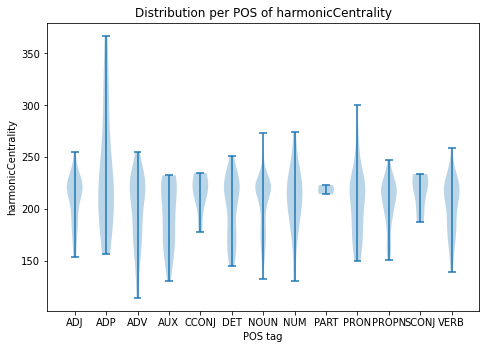

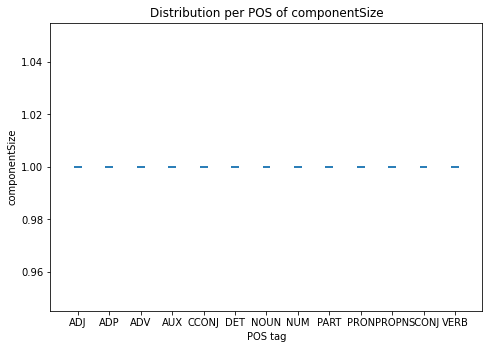

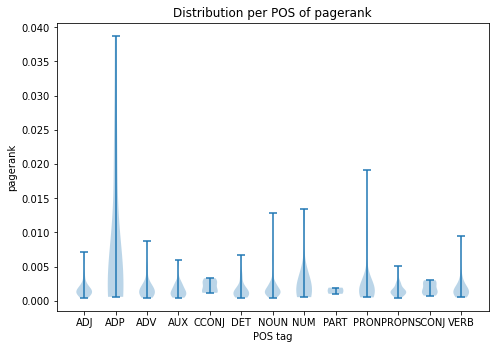

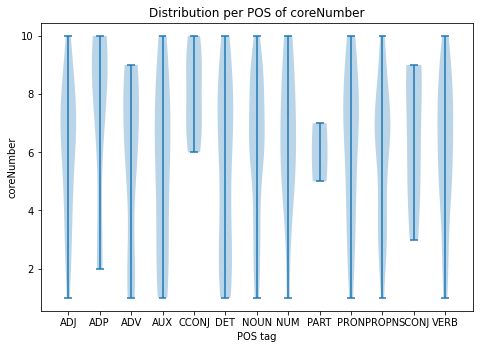

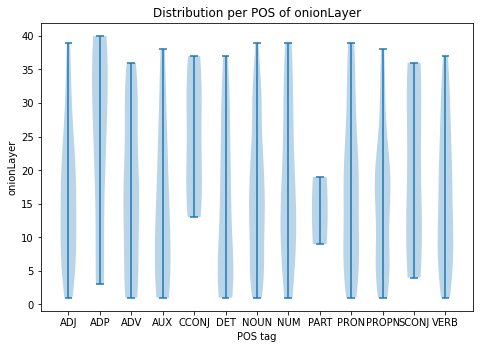

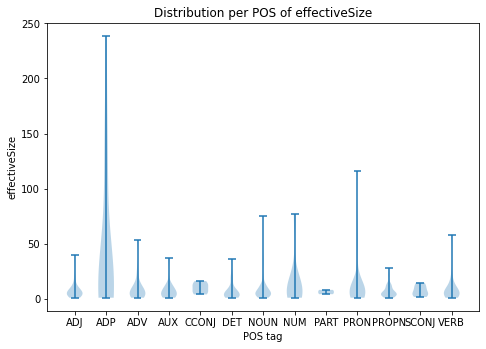

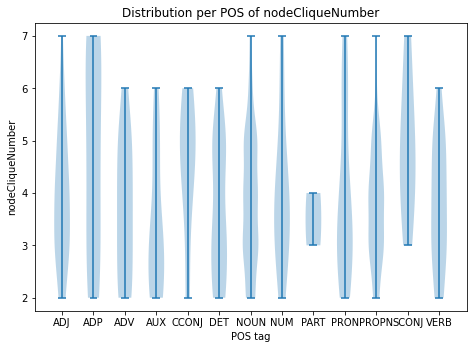

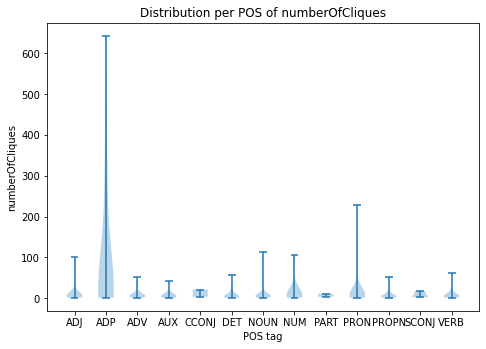

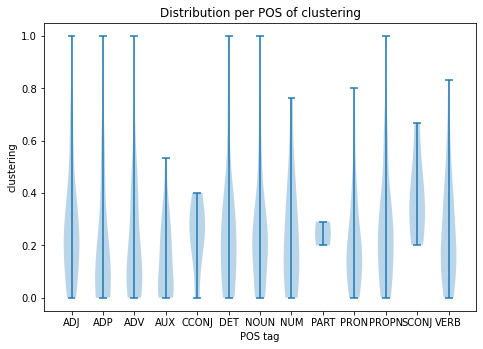

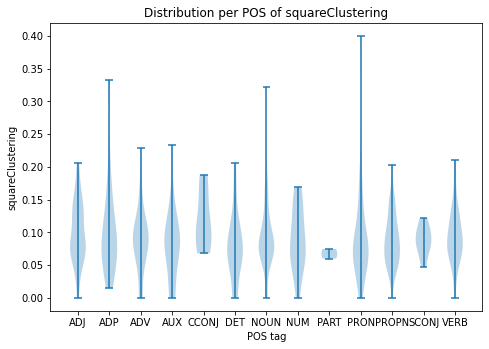

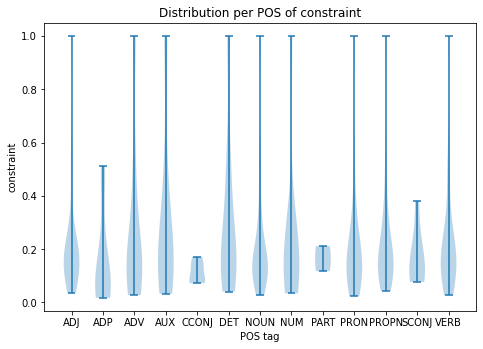

,id_palabra,palabra,language,POS,ranking,lemmatized,pc1,pc2,pc3,rgb1,...,componentSize,pagerank,coreNumber,onionLayer,effectiveSize,nodeCliqueNumber,numberOfCliques,clustering,squareClustering,constraint
0,3,de,Spanish,ADP,1,no,-0.1283,-26.2240,18.2573,0.5936,...,1.0,0.000580,2.0,3.0,2.000000,2.0,2.0,0.000000,0.333333,0.500000
1,12,el,Spanish,DET,2,no,-0.4497,-13.4230,7.2562,0.5777,...,1.0,0.004354,9.0,31.0,22.846154,5.0,27.0,0.126154,0.048478,0.056165
2,5,y,Spanish,CCONJ,4,no,-1.0313,-12.7740,6.5063,0.5489,...,1.0,0.002701,10.0,37.0,11.823529,6.0,17.0,0.323529,0.090285,0.081725
3,16,a,Spanish,ADP,5,no,-0.0578,-18.8529,11.6540,0.5970,...,1.0,0.038725,10.0,39.0,238.627530,7.0,643.0,0.034034,0.052872,0.017916
4,33,en,Spanish,ADP,6,no,-0.1746,-14.9691,8.9867,0.5913,...,1.0,0.018124,10.0,39.0,110.517241,7.0,181.0,0.047676,0.058618,0.018343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2430,cifra,Spanish,NOUN,496,no,-1.4300,0.2102,-0.5012,0.5292,...,1.0,0.001932,7.0,19.0,8.454545,5.0,8.0,0.254545,0.088484,0.107500
490,5041,alguna,Spanish,DET,497,no,-6.8254,4.6908,3.0135,0.2624,...,1.0,0.001401,7.0,18.0,6.500000,4.0,5.0,0.214286,0.106876,0.139632
491,3424,sanitario,Spanish,ADJ,498,no,-6.8644,2.0778,1.8540,0.2605,...,1.0,0.001469,7.0,18.0,7.000000,4.0,5.0,0.142857,0.050035,0.139382
492,3230,universidad,Spanish,PROPN,499,no,5.2394,3.5474,3.5564,0.8590,...,1.0,0.001284,7.0,18.0,5.571429,4.0,4.0,0.238095,0.072937,0.166617


In [6]:


#Starting by eliminating closeness vitality, which is probably broken
goodprops = {key:propertiesDict[key] for key in propertiesDict.keys() if key not in ['closenessVitality']}
#loading our dataframes with all the  info
dfplot = read_plot_info(netName,0,iol)
#geting our pos tags
postags = dfplot.groupby(by = 'POS').mean().index
#getting our list of nodes
nodeList = dfplot['id_palabra'].to_list()
for key in goodprops.keys():
    prop = goodprops[key]
    zipdict = dict(zip(nodeList,prop))
    orderednodes = dfplot['id_palabra'].to_list()
    #adding node properties to our dataframe as columns
    dfplot[key] = pd.Series([zipdict[node] for node in orderednodes])
    valuesperpos = []
    #creating the distributions per pos and per tag
    for tag in postags:
        values = dfplot[dfplot['POS'] == tag][key].to_list()
        valuesperpos.append(values)
    
    #plotting the results
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    bp = ax.violinplot(valuesperpos)
    ax.set_xticks([i for i in range(1,len(postags)+1,1)])
    ax.set_xticklabels(postags)
    plt.title(f'Distribution per POS of {key}')
    plt.xlabel('POS tag')
    plt.ylabel(key)
    plt.show()
    
dfplot
    



In [7]:
postags = dfplot.groupby(by = 'POS').mean().index


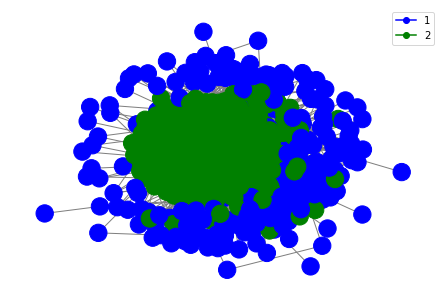

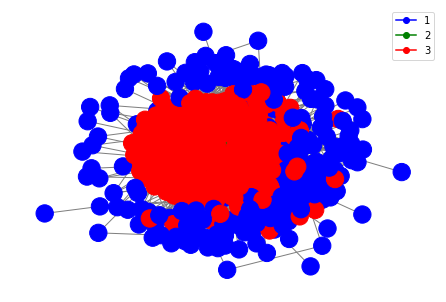

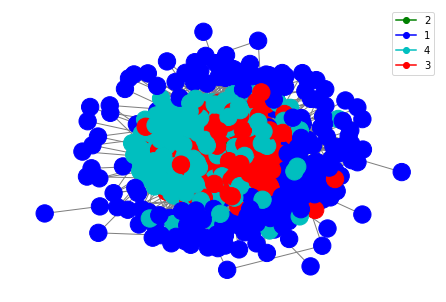

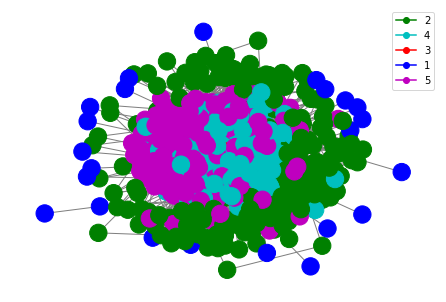

In [8]:
import networkx as nx
from pylab import colorbar
from matplotlib.lines import Line2D
#plotting the network, standard procedure for loading them up
from utils import csv2df,load_network
langframe = csv2df(f'files/{iol}/dataframes/{netName}.csv')
mostfreq =langframe.unique_id.to_list()
thisNetwork = load_network(f'files/{iol}/dictionaries/{netName}.json')
thisNetwork=thisNetwork.subgraph(mostfreq)
Gcc = sorted(nx.connected_components(thisNetwork), key=len, reverse=True); 
thisNetwork = nx.Graph(thisNetwork.subgraph(Gcc[0]));
#Now we have to follow the order of g.nodes(), so we will have to rearrange
#the colors in the dataframe in that order
nodeList = [int(node) for node in thisNetwork.nodes()]
colors2 = dict(zip(dfplot['id_palabra'].to_list(),dfplot['nc2']))
colors3 = dict(zip(dfplot['id_palabra'].to_list(),dfplot['nc3']))
colors4 = dict(zip(dfplot['id_palabra'].to_list(),dfplot['nc4']))
colors5 = dict(zip(dfplot['id_palabra'].to_list(),dfplot['nc5']))
realcolors2 = [colors2[node] for node in nodeList]
realcolors3 = [colors3[node] for node in nodeList]
realcolors4 = [colors4[node] for node in nodeList]
realcolors5 = [colors5[node] for node in nodeList]
colors2 = {1:'b',2:'g',3:'r',4:'c',5:'m'}
truecolors2 = [colors2[tc] for tc in realcolors2]
truecolors3 = [colors2[tc] for tc in realcolors3]
truecolors4 = [colors2[tc] for tc in realcolors4]
truecolors5 = [colors2[tc] for tc in realcolors5]
colorsinverse2 = {value:key for key,value in colors2.items()}
for colorset in [truecolors2,truecolors3, truecolors4,truecolors5]:
    nx.draw(thisNetwork, with_labels=False, pos=nx.kamada_kawai_layout(thisNetwork), node_color=colorset, edge_color="tab:gray"); 
    ax.set_aspect("equal"); 
    legend_elements=[]
    for color in set(colorset):
        tc=colorsinverse2[color]
        legend_elements.append(Line2D([0],[0],marker = 'o',
            color = color, label = f'{tc}'))
    ax = plt.gca()
    ax.legend(handles=legend_elements, loc = 'upper right')
    #legend_elements = []
    plt.show()
    


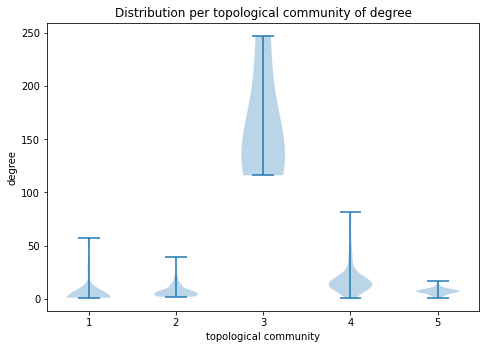

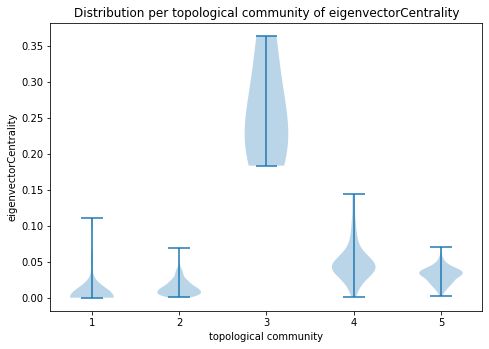

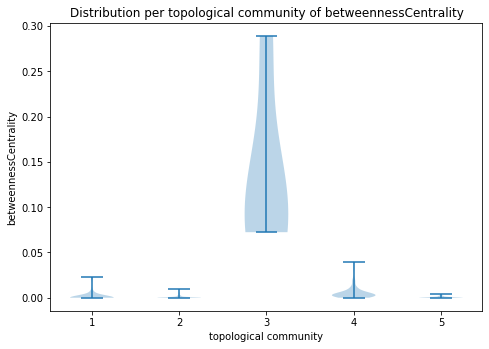

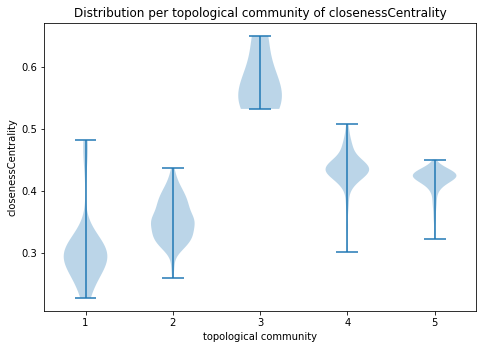

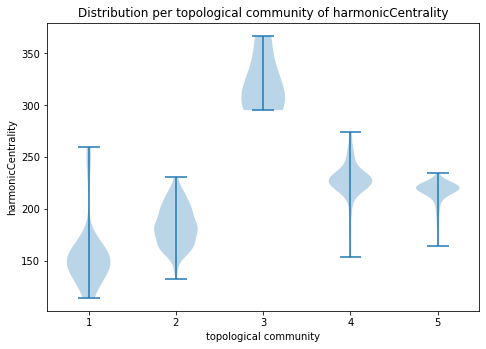

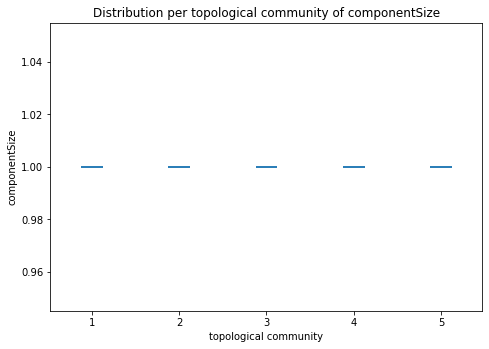

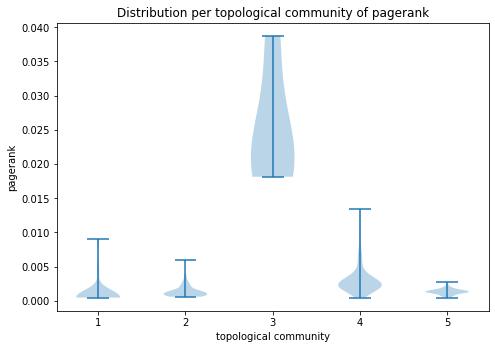

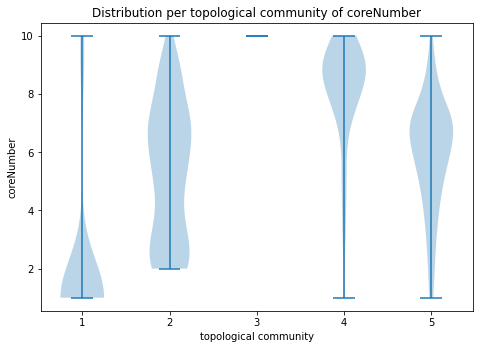

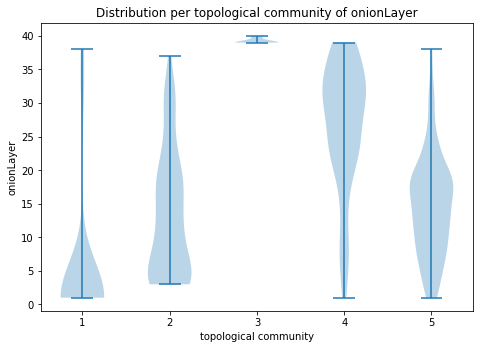

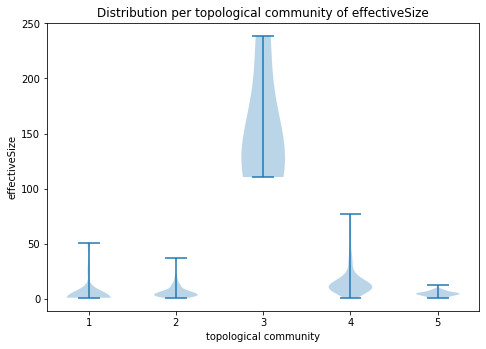

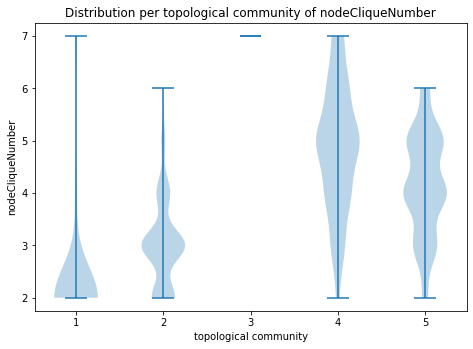

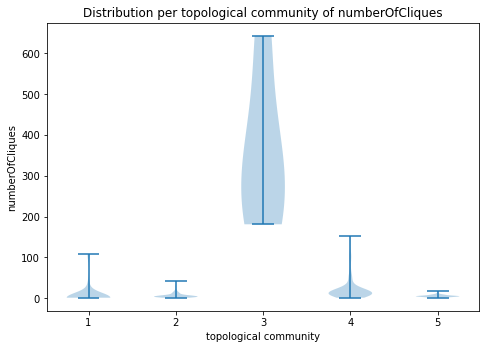

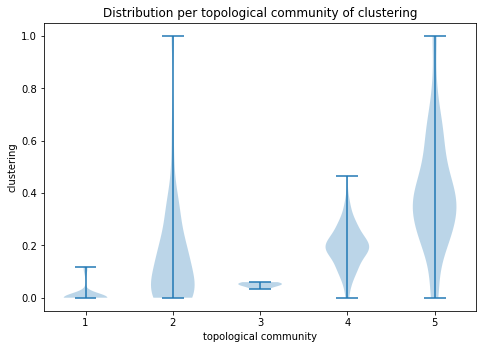

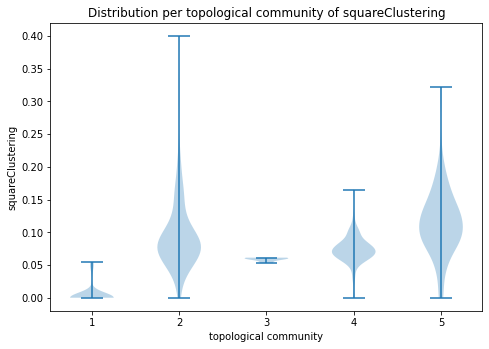

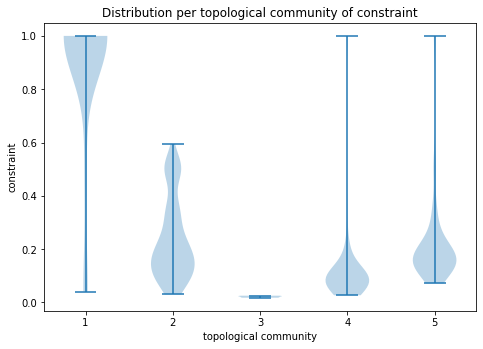

In [9]:
#same violin plots as before, but know grouping by topological communities, nc= 5 has been chosem
for key in goodprops.keys():
    prop = goodprops[key]
    zipdict = dict(zip(nodeList,prop))
    orderednodes = dfplot['id_palabra'].to_list()
    dfplot[key] = pd.Series([zipdict[node] for node in orderednodes])
    valuesperpos = []
    topcoms = [i for i in range(1,6,1)]
    for topcom in topcoms:
        values = dfplot[dfplot['nc5'] == topcom][key].to_list()
        valuesperpos.append(values)
    

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    bp = ax.violinplot(valuesperpos)
    ax.set_xticks([i for i in range(1,len(topcoms)+1,1)])
    ax.set_xticklabels(topcoms)
    plt.title(f'Distribution per topological community of {key}')
    plt.xlabel('topological community')
    plt.ylabel(key)
    plt.show()

In [10]:
#Here we are going to study the distribution of words by part of speech through the topological communities
cpertcandpos=dfplot.groupby(by=['nc5','POS']).count()['palabra']
cpertc = dfplot.groupby(by=['nc5']).count()['palabra']
cperpos = dfplot.groupby(by=['POS']).count()['palabra']
dict_cpertc = dict(cpertc)
dict_cperpos = dict(cperpos)
dict_cpertcandpos= dict(cpertcandpos)
#dict_fracposovertc tells us the fraction that a particular part of speech represents across all other POS in a particular TC
dict_fracposovertc = {key:(dict_cpertcandpos[key]/dict_cpertc[key[0]]) for key in dict_cpertcandpos} 
#dict_fracposoverpos tells us the fraction that a particular part of speech in a particular TC over all words ibelonging to that POS
dict_fracposoverpos = {key:(dict_cpertcandpos[key]/dict_cperpos[key[1]]) for key in dict_cpertcandpos}


In [11]:
def plot_fractions_per_tc(fracposoverpos, fracposovertc, labels,tc, path=''):
    fig, ax = plt.subplots()
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(
        x - width / 2, fracposoverpos,edgecolor = 'black', width = width, label="frac POS over all words", color='#0b8eab'
    )
    rects2 = ax.bar(
        x + width / 2, fracposovertc,edgecolor = 'black', width = width, label="frac over TC", color='#ffc152'
    )

    plt.ylabel("Relative frequency", fontsize=12)
    plt.title(f"Distribution of POS tags across TC {tc}")
    #ax.set_xticks(x, labels)
    ax.legend()

    '''
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    '''

    plt.xticks(x, labels,fontsize = 8)
    #plt.yticks(fontsize=12)
    plt.show()
    #plt.savefig(path, dpi=200)
    #plt.close(fig)

In [12]:
def plot_fractions_per_pos(fractcoverpos,labels,pos, path=''):
    fig, ax = plt.subplots()
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(
        x , fractcoverpos,edgecolor = 'black', width = width, label="frac over POS", color='#0b8eab'
    )
   

    plt.ylabel("Relative frequency", fontsize=12)
    plt.title(f"Distribution of {pos} POS tag across TCs")
    #ax.set_xticks(x, labels)
    

    '''
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    '''

    plt.xticks(x, labels)
    plt.xlabel("Topological community")
    #plt.yticks(fontsize=12)
    plt.show()
    #plt.savefig(path, dpi=200)
    #plt.close(fig)

In [13]:
def plot_entropy(entropy,labels,tag):
    fig, ax = plt.subplots()
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(
        x , entropy,edgecolor = 'black', width = width, color='#0b8eab'
    )
    

    plt.ylabel("Entropy", fontsize=12)
    plt.title(f"Distribution of entropy {tag}")
    #ax.set_xticks(x, labels)


    '''
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    '''

    plt.xticks(x, labels,fontsize = 8)

In [14]:
#Rel frequency of POS vs. all words will be calculated to see the real importance of each pos tag in each topology
rel_freq_pos_over_total = dict((dfplot.groupby(by='POS').count()['palabra']/len(dfplot)).transpose())
rel_freq_pos_over_total

{'ADJ': 0.08704453441295547,
 'ADP': 0.03643724696356275,
 'ADV': 0.0708502024291498,
 'AUX': 0.0465587044534413,
 'CCONJ': 0.012145748987854251,
 'DET': 0.0708502024291498,
 'NOUN': 0.3582995951417004,
 'NUM': 0.024291497975708502,
 'PART': 0.004048582995951417,
 'PRON': 0.09109311740890688,
 'PROPN': 0.1194331983805668,
 'SCONJ': 0.01417004048582996,
 'VERB': 0.06477732793522267}

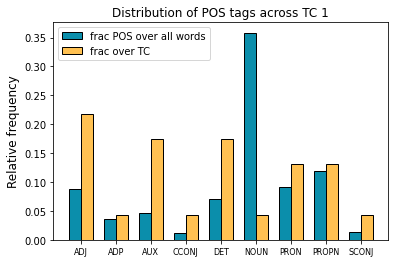

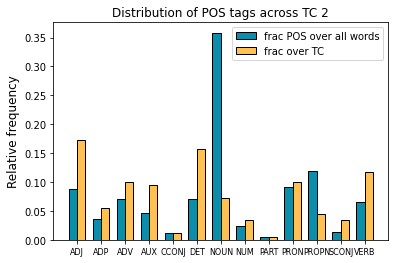

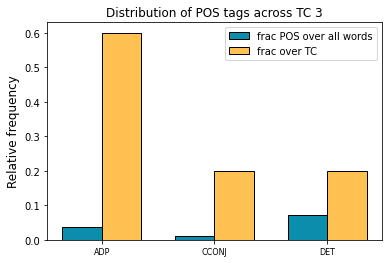

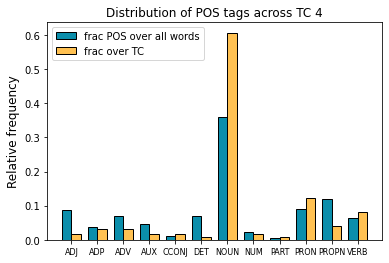

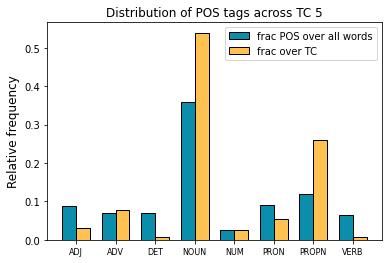

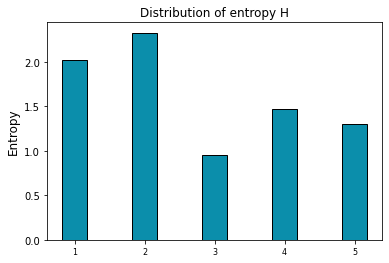

In [15]:
entropy_H = []
for tc in range(1,6,1):
    list_fracposovertc = []
    list_fracposoverpos = []
    list_relfreposovertotal = []
    list_labelpos = []
    for key in dict_fracposovertc.keys():
        if tc == key[0]:
            pos = key[1]
            list_fracposovertc.append(dict_fracposovertc[key])
            list_fracposoverpos.append(dict_fracposoverpos[key])
            list_labelpos.append(pos)
            list_relfreposovertotal.append(rel_freq_pos_over_total[key[1]])
    plot_fractions_per_tc(list_relfreposovertotal, list_fracposovertc, list_labelpos,tc)
    entropy_H.append(-np.dot(np.array(list_fracposovertc),np.log(np.array(list_fracposovertc))))
plot_entropy(entropy_H,['1','2','3','4','5'],'H')

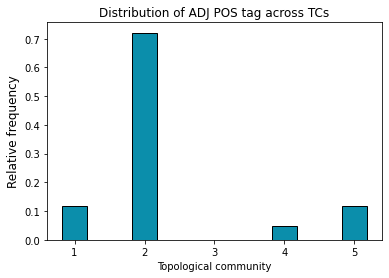

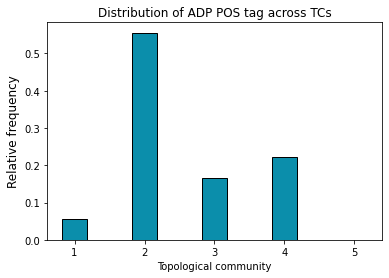

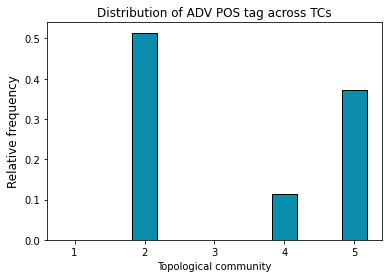

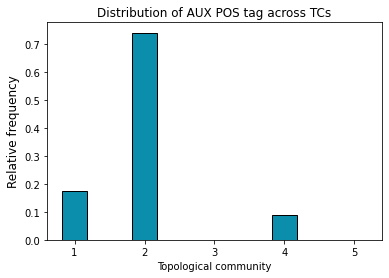

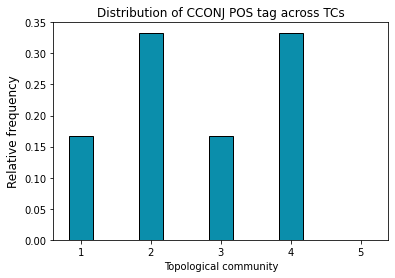

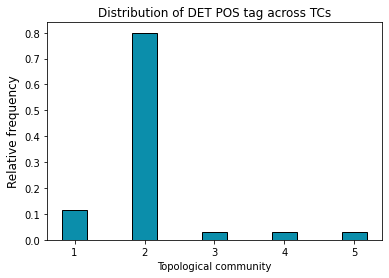

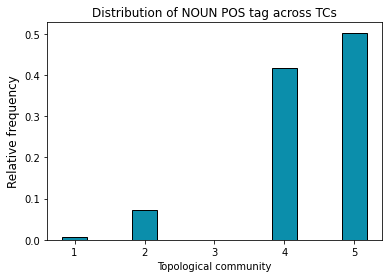

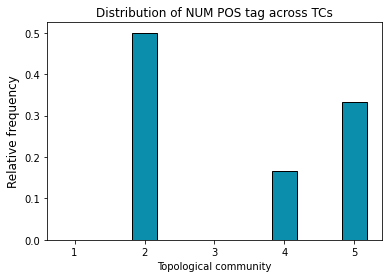

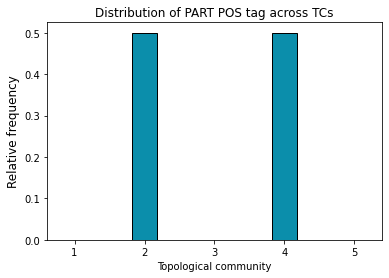

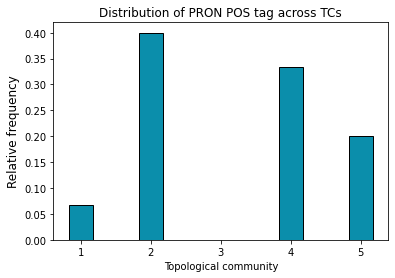

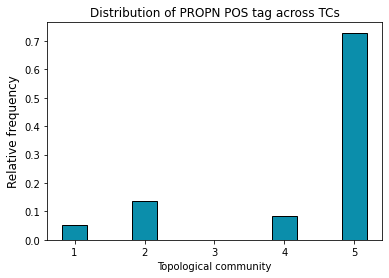

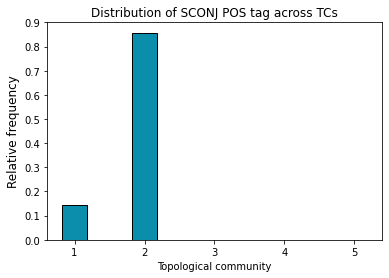

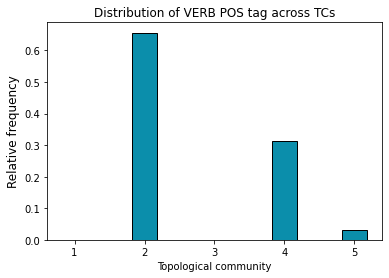

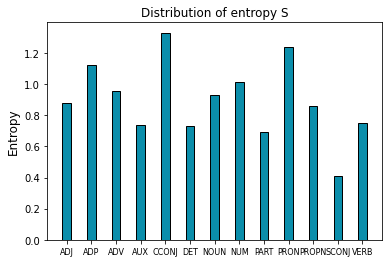

In [16]:
#Now we do the same over each POS tag, to see how they distribute acroos topological communities
entropy_S = []
for tag in postags:
    list_fractcoverpos = []
    total_labels =[str(i) for i in range(1,6,1)]
    list_labelstc = []
    def_frac = [0, 0, 0, 0, 0]
    for key in dict_fracposovertc.keys():
        tc = key[0]
        if tag == key[1]:    
            list_fractcoverpos.append(dict_fracposoverpos[key])
            list_labelstc.append(int(tc))
    for index,value in enumerate(list_labelstc):
        def_frac[value-1] = list_fractcoverpos[index] 
        
    plot_fractions_per_pos(def_frac,total_labels,tag)
    entropy_S.append(-np.dot(np.array(list_fractcoverpos),np.log(np.array(list_fractcoverpos))))
plot_entropy(entropy_S,postags,'S')
            

In [41]:
from utils import json2dict
nodeList = dfplot['id_palabra'].to_list()
#Here we are going to load the dictionary from which the network was orignially created, in order to see the connections each node makes
jsonname = f"files/{iol}/dictionaries/{netName}.json"
connections = json2dict(jsonname, transform_keys=True)
#We filter here since we only want connections from nodes that actually are in the network(top 500 words, 1st gcc)
connections = {key:connections[key] for key in connections if key in nodeList}
#We prepare a dicitionary to map words connected to topologies
dict_palabranc5 = dict(zip(dfplot['id_palabra'].to_list(),dfplot['nc5'].to_list()))
#dict_palabranc5 = {int(key):value for key,value in dict_palabranc5.items()}
dict_palabranc5.keys()
list_connectedtc={}
#Here we form a dictionary storing the number of times each word is connected to each topology, list_conectedtc(This was a mistake, is not a list)
for node in nodeList:
    connections[node] = list(set(connections[node]))
    connections[node] = [id for id in connections[node] if id != node]
    nodesconnected = connections[node]
    topologies = [dict_palabranc5[id] for id in nodesconnected if id in nodeList]
    
    list_connectedtc[node] = (topologies)
#We are going to store the number of times each word is connected to each tc in this variables
cnxnstc1 = []
cnxnstc2 = []
cnxnstc3 = []
cnxnstc4 = []
cnxnstc5 = []
cnxnstotal = []
for node in nodeList:
    cnxnlist = []
    total_connections = len(list_connectedtc[node])
    for i in range(1,6,1):
        list_count_tc = [tc for tc in list_connectedtc[node] if tc == i]
        cnxnlist.append(len(list_count_tc))
    cnxnstc1.append(cnxnlist[0])
    cnxnstc2.append(cnxnlist[1])
    cnxnstc3.append(cnxnlist[2])
    cnxnstc4.append(cnxnlist[3])
    cnxnstc5.append(cnxnlist[4])
    cnxnstotal.append(total_connections)
#Incorporating this data to our df
dfplot['cnxnstc1'] = pd.Series(cnxnstc1)
dfplot['cnxnstc2'] = pd.Series(cnxnstc2)
dfplot['cnxnstc3'] = pd.Series(cnxnstc3)
dfplot['cnxnstc4'] = pd.Series(cnxnstc4)
dfplot['cnxnstc5'] = pd.Series(cnxnstc5)
dfplot['cnxnstotal'] = pd.Series(cnxnstotal)


#list_connectedtc = {key:[dict_palabranc5[node] for node in value] for key,value in connections.items()}
#list_connectedtc

In [42]:
#Calculating frequencies of connection to each community
dfplot['rel_cnxnstc1'] = dfplot['cnxnstc1']/dfplot['cnxnstotal']
dfplot['rel_cnxnstc2'] = dfplot['cnxnstc2']/dfplot['cnxnstotal']
dfplot['rel_cnxnstc3'] = dfplot['cnxnstc3']/dfplot['cnxnstotal']
dfplot['rel_cnxnstc4'] = dfplot['cnxnstc4']/dfplot['cnxnstotal']
dfplot['rel_cnxnstc5'] = dfplot['cnxnstc5']/dfplot['cnxnstotal']

In [44]:
#making sure are number of connections to topologies equals the degree of each node
dfplot[dfplot['cnxnstotal']==dfplot['degree']][['id_palabra','cnxnstc1','cnxnstc2','cnxnstc3','cnxnstc4','cnxnstc5','cnxnstotal','degree','rel_cnxnstc1','rel_cnxnstc2','rel_cnxnstc3','rel_cnxnstc4','rel_cnxnstc5']]

,id_palabra,cnxnstc1,cnxnstc2,cnxnstc3,cnxnstc4,cnxnstc5,cnxnstotal,degree,rel_cnxnstc1,rel_cnxnstc2,rel_cnxnstc3,rel_cnxnstc4,rel_cnxnstc5
0,3,0,0,3,99,145,247,247.0,0.0,0.000000,0.012146,0.400810,0.587045
1,12,0,17,3,49,54,123,123.0,0.0,0.138211,0.024390,0.398374,0.439024
2,5,0,25,2,46,43,116,116.0,0.0,0.215517,0.017241,0.396552,0.370690
3,16,0,9,4,70,91,174,174.0,0.0,0.051724,0.022989,0.402299,0.522989
4,33,0,14,4,61,59,138,138.0,0.0,0.101449,0.028986,0.442029,0.427536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2430,0,1,0,4,2,7,7.0,0.0,0.142857,0.000000,0.571429,0.285714
490,5041,0,0,0,1,0,1,1.0,0.0,0.000000,0.000000,1.000000,0.000000
491,3424,0,0,0,1,1,2,2.0,0.0,0.000000,0.000000,0.500000,0.500000
492,3230,0,0,3,3,1,7,7.0,0.0,0.000000,0.428571,0.428571,0.142857


In [45]:
#gettin here total connections to each community by POS tag
thickness = dfplot.groupby(by='POS').sum()[['cnxnstc1','cnxnstc2','cnxnstc3','cnxnstc4','cnxnstc5','cnxnstotal']]
#Now getting the frequency of connections to each tc by POS
thickness['rel_cnxnstc1'] = thickness['cnxnstc1']/thickness['cnxnstotal']
thickness['rel_cnxnstc2'] = thickness['cnxnstc2']/thickness['cnxnstotal']
thickness['rel_cnxnstc3'] = thickness['cnxnstc3']/thickness['cnxnstotal']
thickness['rel_cnxnstc4'] = thickness['cnxnstc4']/thickness['cnxnstotal']
thickness['rel_cnxnstc5'] = thickness['cnxnstc5']/thickness['cnxnstotal']


In [46]:
thickness

,cnxnstc1,cnxnstc2,cnxnstc3,cnxnstc4,cnxnstc5,cnxnstotal,rel_cnxnstc1,rel_cnxnstc2,rel_cnxnstc3,rel_cnxnstc4,rel_cnxnstc5
POS,,,,,,,,,,,
ADJ,2,23,22,101,34,182,0.010989,0.126374,0.120879,0.554945,0.186813
ADP,1,68,20,390,409,888,0.001126,0.076577,0.022523,0.439189,0.460586
ADV,1,92,33,133,30,289,0.003460,0.318339,0.114187,0.460208,0.103806
AUX,0,40,8,84,19,151,0.000000,0.264901,0.052980,0.556291,0.125828
CCONJ,1,43,3,69,49,165,0.006061,0.260606,0.018182,0.418182,0.296970
DET,1,54,7,199,110,371,0.002695,0.145553,0.018868,0.536388,0.296496
NOUN,12,545,438,690,250,1935,0.006202,0.281654,0.226357,0.356589,0.129199
NUM,0,16,19,51,20,106,0.000000,0.150943,0.179245,0.481132,0.188679
PART,0,15,5,28,6,54,0.000000,0.277778,0.092593,0.518519,0.111111


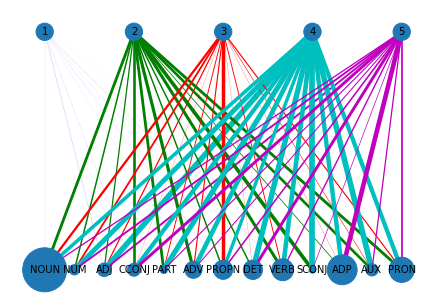

In [47]:
from turtle import color, width
#Using data calculated above to form our bipartite network with edges' width set as relative frequency of connections

thick_plot = thickness[['rel_cnxnstc1','rel_cnxnstc2','rel_cnxnstc3','rel_cnxnstc4','rel_cnxnstc5']]
asd=dict(thick_plot.transpose())
labels = [label for label in asd['ADJ'].index]
dict_conn_thickness ={}
dict_def_thickness = {}
dict_conn ={}
tcs = [1,2,3,4,5]
for key in asd:
    dict_conn_thickness[key] = asd[key].to_list()
    dict_def_thickness[key] = []
    dict_conn[key] = []
    for index,value in enumerate(dict_conn_thickness[key]):
        if value>0:
            dict_conn[key].append(index+1)
            dict_def_thickness[key].append(value)

            
        
g = nx.Graph()
#g.add_nodes_from(dict_def_thickness.keys())
colors = {'ADV':'b','CCONJ':'g','VERB':'r','ADJ':'c',
    'PRON':'m','DET':'y','ADP':'k','PROPN':'w','SCONJ':'tab:purple',
    'NOUN':'tab:orange','NUM':'tab:pink','PART':'tab:brown','AUX':'tab:olive'}
colors2 = ['b','g','r','c','m']
for k in dict_conn.keys():
    for i,v in enumerate(tcs):
        g.add_edge(k,v,color= colors2[i],weight=dict_conn_thickness[k][i]*10)
edges = g.edges()
degrees = dict(thickness['cnxnstotal'].transpose())
minignodelist = [node for node in g.nodes]
list_nodesize = [degrees[key] if key in postags else 300 for key in minignodelist]        
pos = nx.bipartite_layout(g,postags,align = 'horizontal',aspect_ratio=3.5/3)
colors = [g[u][v]['color'] for u,v in edges]
weights = [g[u][v]['weight'] for u,v in edges]
plt.figure()
nx.draw(g,pos,width=weights, edge_color = colors, node_size = list_nodesize, with_labels = True,font_size=10)
